# 타이타닉 데이터 EDA Solution
기본적으로 EDA는 데이터를 탐색하고 모델링을 위한 변수확인 및 전처리의 아이디어를 얻고자 실행합니다. 정답이나 베스트는 없어요~  

다만 데이터를 통해 얻을 수 있는 인사이트를 확인하며 인사이트를 얻기 위한 논리의 근거를 데이터로서 확인해야 하는 과정에 집중하시면 됩니다.

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

## EDA 진행 예시

### 타이타닉 탑승자 데이터 불러오기

In [91]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# 데이터 로딩 및 확인
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [93]:
df['survived'].unique()

array([1, 0])

In [94]:
df['survived'].value_counts()
# 1309명 중 생존 500명, 사망 809명

0    809
1    500
Name: survived, dtype: int64

In [95]:
df['sex'].value_counts()
# 1309명 중 남자 843명, 여자 466명

male      843
female    466
Name: sex, dtype: int64

In [96]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [97]:
df['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [98]:
# 데이터 종류 확인하기 / 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


각 작업을 거친 후 데이터에 대한 리포트 혹은 시각화를 통해 얻을 수 있는 정보를 기술 해봅니다.  
위의 정보를 바탕으로 1309개의 샘플이 존재하지만 몇몇 개의 컬럼에는 결측치(비어있는 값)이 있음을 확인 할 수 있습니다

In [99]:
# 기초통계량 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


전체 탑승객의 생존률, 평균 연령 정도가 우리가 확인하고 추후 생각해보아야 할 데이터 같습니다.

## 샘플링으로 데이터 살펴보기
그룹별 생존률 (객실 등급, 성별, 나이, 운임, 가족의 수, 선착장 등)

In [100]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [101]:
# 전체 생존률은 약 38.2%
df['survived'].mean()
# 1309명 중 생존 500명, 사망 809명

0.3819709702062643

In [102]:
# 객실 등급이 높을수록 생존률 높음. (1 - 62.0%, 2 - 43.0%, 3 - 25.5%) 
# survived 통계만 보고 싶다면 df.groupby('pclass').mean()['survived]
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159930,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [103]:
# 여성이 남성보다 생존률 높음. (여성 - 72.7% vs 남성 - 19.1%)
df.groupby('sex').mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687088,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585228,0.413998,0.247924,26.154601,160.39823


In [104]:
df['sibsp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [105]:
# 배우자, 형제자매의 수는 생존률과 유의미한 상관관계 보이지 않음. (일부 그룹 모수가 너무 적음.)
df.groupby('sibsp').mean()

,pclass,survived,age,parch,fare,body
sibsp,,,,,,
0,2.351291,0.346801,30.921766,0.181818,25.785406,162.747253
1,2.034483,0.510972,31.058071,0.717868,48.711300,159.720000
2,2.333333,0.452381,23.569444,0.571429,48.940576,194.666667
3,2.550000,0.300000,16.312500,1.250000,71.332090,4.000000
4,3.000000,0.136364,8.772727,1.545455,30.594318,NaN
5,3.000000,0.000000,10.166667,2.000000,46.900000,NaN
8,3.000000,0.000000,14.500000,2.000000,69.550000,67.000000


In [106]:
df['parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: parch, dtype: int64

In [107]:
# 부모, 자녀의 수는 생존률과 유의미한 상관관계 보이지 않음. (일부 그룹 모수가 너무 적음.)
df.groupby('parch').mean()

,pclass,survived,age,sibsp,fare,body
parch,,,,,,
0,2.311377,0.335329,31.969401,0.243513,26.329820,160.873786
1,2.158824,0.588235,24.965625,1.029412,50.078358,161.900000
2,2.300885,0.504425,18.975979,1.902655,61.346275,118.800000
3,2.125000,0.625000,38.875000,0.875000,86.688537,NaN
4,2.333333,0.166667,47.600000,0.666667,104.723617,206.000000
5,3.000000,0.166667,39.333333,0.666667,32.356250,234.500000
6,3.000000,0.000000,41.500000,1.000000,46.900000,NaN
9,3.000000,0.000000,NaN,1.000000,69.550000,NaN


In [108]:
# C 선착장에서 탑승한 승객들의 생존률이 더 높음. (C - 55.6%, Q - 35.8%, S - 33.3%)
df.groupby('embarked').mean()

,pclass,survived,age,sibsp,parch,fare,body
embarked,,,,,,,
C,1.851852,0.555556,32.332170,0.400000,0.370370,62.336267,162.000000
Q,2.894309,0.357724,28.630000,0.341463,0.113821,12.409012,175.142857
S,2.347921,0.332604,29.245205,0.550328,0.426696,27.418824,159.348315


중간 결론(1)
: 객실 등급이 높을수록, 여성이 남성보다, C 선착장에 탑승한 승객들이 생존률이 높음.

In [109]:
# 1등급 객실에 승선한 여성(144명)의 생존률
df[(df['pclass'] == 1) & (df['sex'] == 'female')]['survived'].sum()

139

In [110]:
# 1등급 객실에 승선한 여성의 생존률은 약 96.5%
139 / 144 * 100

96.52777777777779

In [111]:
# C 선착장에 탑승한 여성(113명)의 생존률
df[(df['embarked'] == 'C') & (df['sex'] == 'female')]['survived'].sum()

102

In [112]:
# C 선착장에 탑승한 여성(113명)의 생존률은 약 90.3%
102 / 113 * 100

90.2654867256637

In [113]:
# C 선착장에서 탑승, 1등급 객실에 승선한 사람들(141명)의 생존률
df[(df['embarked'] == 'C') & (df['pclass'] == 1)]['survived'].sum()

97

In [114]:
# C 선착장에서 탑승, 1등급 객실에 승선한 사람들(141명)의 생존률은 68.8%
97 / 141 * 100

68.79432624113475

In [115]:
# C 선착장에서 탑승, 1등급 객실에 승선한 여성들(71명)의 생존률
df[(df['embarked'] == 'C') & (df['pclass'] == 1) & (df['sex'] == 'female')]['survived'].sum()

69

In [116]:
# C 선착장에서 탑승, 1등급 객실에 승선한 여성들(71명)의 생존률은 97.2%
69 / 71 * 100

97.1830985915493

### 시각화로 데이터 살펴보기

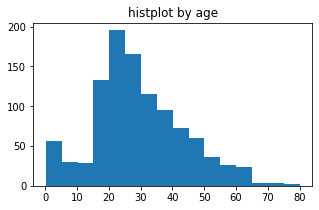

In [117]:
# 판다스 내장 함수로 시각화 가능
# df['age'].hist(bins=20,figsize=(12,9),grid=False);
plt.figure(figsize=(5, 3))
plt.title('histplot by age')
plt.hist(df['age'], bins=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


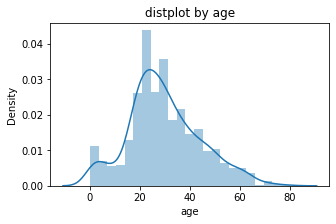

In [118]:
# 연령 분포 확인
plt.figure(figsize=(5,3))
plt.title('distplot by age')
sns.distplot(df['age'])
plt.show()

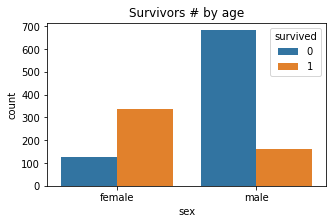

In [119]:
# 성별에 따른 생존자/사망자 수 비교
plt.figure(figsize=(5,3))
plt.title('Survivors # by age')
sns.countplot(data=df, x='sex', hue='survived')
plt.show()

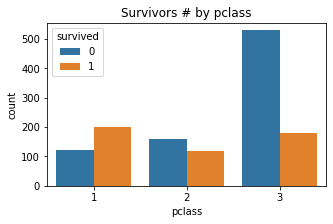

In [120]:
# 객실 등급에 따른 생존자/사망자 수 비교
plt.figure(figsize=(5,3))
plt.title('Survivors # by pclass')
sns.countplot(data=df, x='pclass', hue='survived')
plt.show()

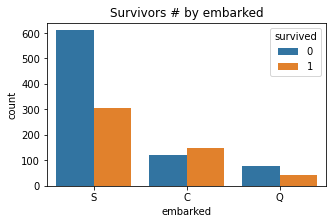

In [121]:
# 선착장에 따른 생존자/사망자 수 비교
plt.figure(figsize=(5,3))
plt.title('Survivors # by embarked')
sns.countplot(data=df, x='embarked', hue='survived')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


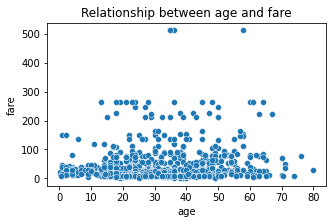

In [122]:
# 연령과 운임의 상관관계 파악
plt.figure(figsize=(5,3))
plt.title('Relationship between age and fare')
sns.scatterplot(df['age'], df['fare'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


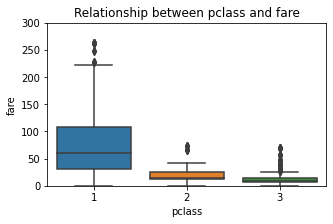

In [127]:
# 객실 등급과 운임의 상관관계 파악
plt.figure(figsize=(5, 3))
plt.title('Relationship between pclass and fare')
plt.ylim([0, 300])
sns.boxplot(df['pclass'], df['fare'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


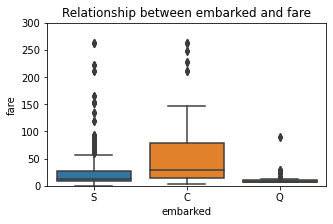

In [128]:
# 선착장과 운임의 상관관계 파악
plt.figure(figsize=(5, 3))
plt.title('Relationship between embarked and fare')
plt.ylim([0, 300])
sns.boxplot(df['embarked'], df['fare'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


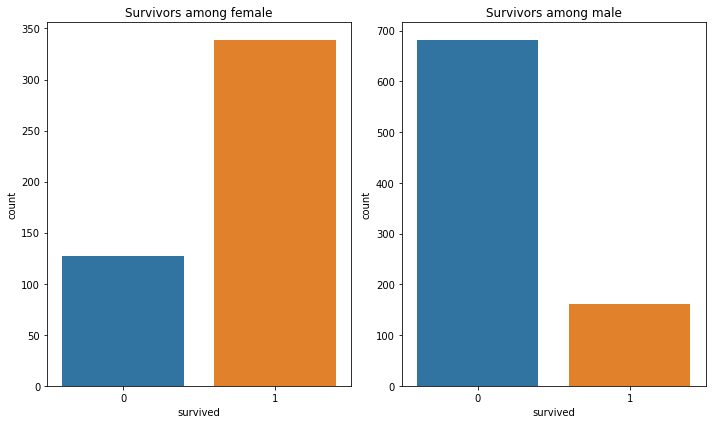

In [208]:
# 성별에 따른 생존자/사망자 수 비교 (subplot)
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.title('Survivors among female')
sns.countplot(df[df['sex'] == 'female']['survived'])

plt.subplot(122)
plt.title('Survivors among male')
sns.countplot(df[df['sex'] == 'male']['survived'])

plt.tight_layout()
plt.show()

# 아래 코드로 하면 한 그래프에 표시
# sns.countplot(data=df, x='sex', hue='survived')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


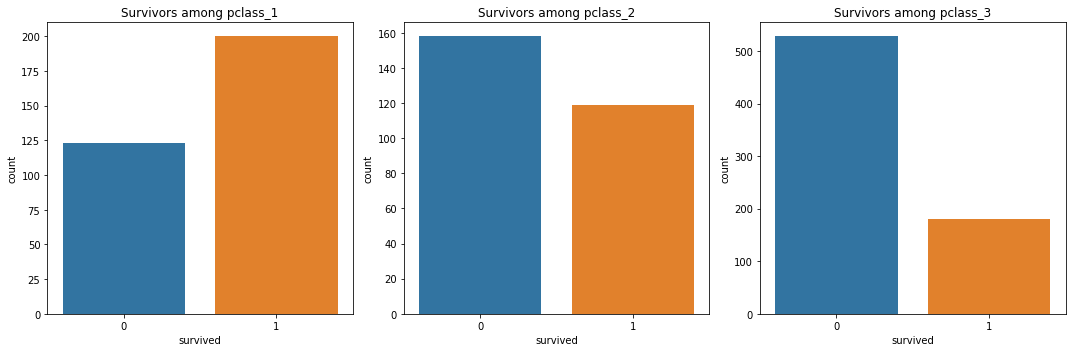

In [139]:
# 객실 등급에 따른 생존자/사망자 수 비교 (subplot)
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title('Survivors among pclass_1')
sns.countplot(df[df['pclass'] == 1]['survived'])

plt.subplot(132)
plt.title('Survivors among pclass_2')
sns.countplot(df[df['pclass'] == 2]['survived'])

plt.subplot(133)
plt.title('Survivors among pclass_3')
sns.countplot(df[df['pclass'] == 3]['survived'])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


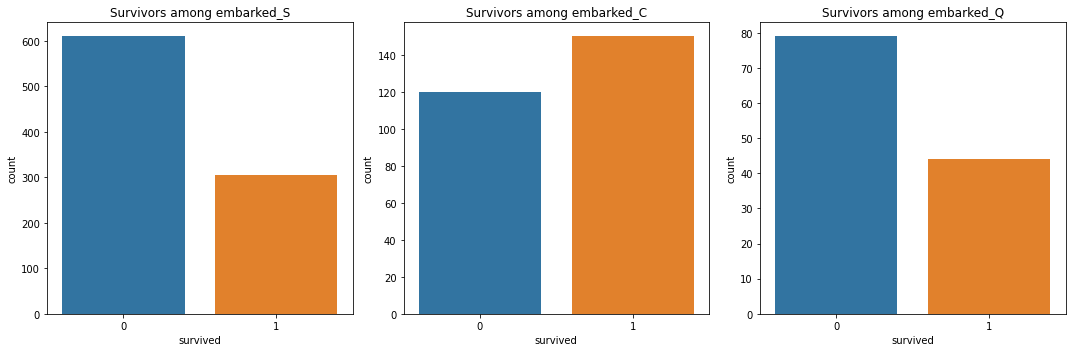

In [142]:
# 선착장에 따른 생존자/사망자 수 비교 (subplot)
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title('Survivors among embarked_S')
sns.countplot(df[df['embarked'] == 'S']['survived'])

plt.subplot(132)
plt.title('Survivors among embarked_C')
sns.countplot(df[df['embarked'] == 'C']['survived'])

plt.subplot(133)
plt.title('Survivors among embarked_Q')
sns.countplot(df[df['embarked'] == 'Q']['survived'])

plt.tight_layout()
plt.show()

In [141]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


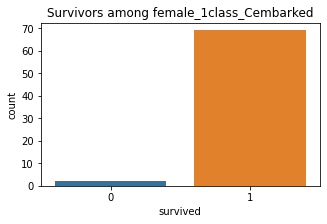

In [144]:
# 1등급 & C선착장 & 여성 중 생존자/사망자 수
plt.figure(figsize=(5, 3))
plt.title('Survivors among female_1class_Cembarked')
sns.countplot(df[(df['sex'] == 'female') & (df['pclass'] == 1) & (df['embarked'] == 'C')]['survived'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


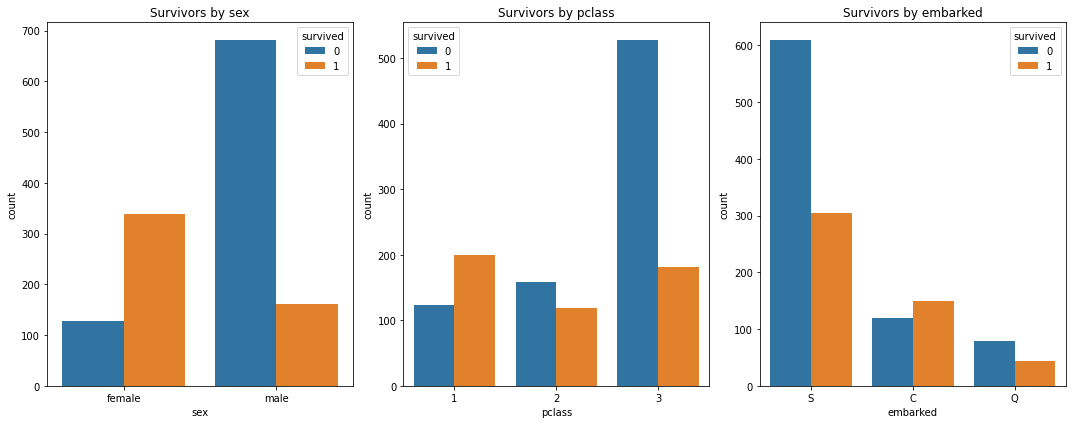

In [149]:
# 성별/객실등급/선착장에 따른 생존자/사망자 수 비교
plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.title('Survivors by sex')
sns.countplot('sex', hue='survived', data=df)

plt.subplot(132)
plt.title('Survivors by pclass')
sns.countplot('pclass', hue='survived', data=df)

plt.subplot(133)
plt.title('Survivors by embarked')
sns.countplot('embarked', hue='survived', data=df)

plt.tight_layout()
plt.show()

In [167]:
# 연령그룹 정의
def age_range(age):
    age_class = ''
    if 0 < age < 5:
        age_class = 'baby'
    elif 5 <= age < 10:
        age_class = 'kid'
    elif 10 <= age < 20:
        age_class = 'teen'
    elif 20 <= age < 30:
        age_class = '20s'
    elif 30 <= age < 40:
        age_class = '30s'
    elif 40 <= age < 50:
        age_class = '40s'
    elif 50 <= age:
        age_class = 'over50s'
    else:
        age_class = 'unknown'

    return age_class

df['age_class'] = df['age'].apply(lambda x: age_range(x))   
age_class_names = ['baby', 'kid', 'teen', '20s', '30s', '40s', 'over50s', 'unknown'] 

In [168]:
df['age_class']

0           20s
1          baby
2          baby
3           30s
4           20s
         ...   
1304       teen
1305    unknown
1306        20s
1307        20s
1308        20s
Name: age_class, Length: 1309, dtype: object

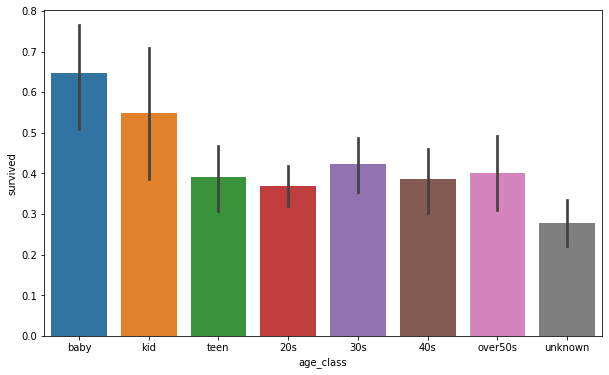

In [169]:
# 연령그룹별 생존률 비교
plt.figure(figsize = (10, 6))
sns.barplot(x='age_class', y='survived', order=age_class_names, data=df)
plt.show()

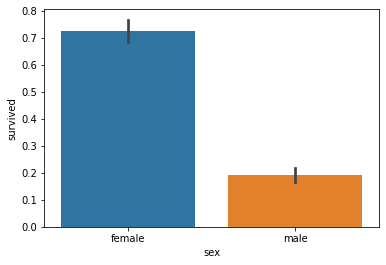

In [170]:
sns.barplot(x='sex', y='survived', data=df)

In [171]:
df['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [175]:
# 운임그룹 정의
def fare_range(fare):
    fare_class = ''
    if 0 < fare < 5:
        fare_class = 'under5'
    elif 5 <= fare < 10:
        fare_class = 'btw5_10'
    elif 10 <= fare < 15:
        fare_class = 'btw10_15'    
    elif 15 <= fare < 20:
        fare_class = 'btw15_20'
    elif 20 <= fare < 30:
        fare_class = 'btw20_30'
    elif 30 <= fare < 40:
        fare_class = 'btw30_40'
    elif 40 <= fare < 50:
        fare_class = 'btw40_50'
    elif 50 <= fare:
        fare_class = 'over50'
    else:
        fare_class = 'unknown'

    return fare_class

df['fare_class'] = df['fare'].apply(lambda x: fare_range(x))   
fare_class_names = ['under5', 'btw5_10', 'btw10_15', 'btw15_20', 'btw20_30', 'btw30_40', 'btw40_50',
                   'over50', 'unknown'] 

In [176]:
df['fare_class']

0         over50
1         over50
2         over50
3         over50
4         over50
          ...   
1304    btw10_15
1305    btw10_15
1306     btw5_10
1307     btw5_10
1308     btw5_10
Name: fare_class, Length: 1309, dtype: object

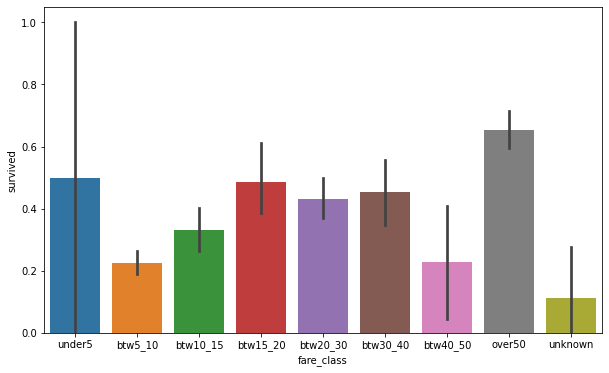

In [177]:
# 운임그룹별 생존률 비교
plt.figure(figsize=(10, 6))
sns.barplot(x='fare_class', y='survived', order=fare_class_names, data=df)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


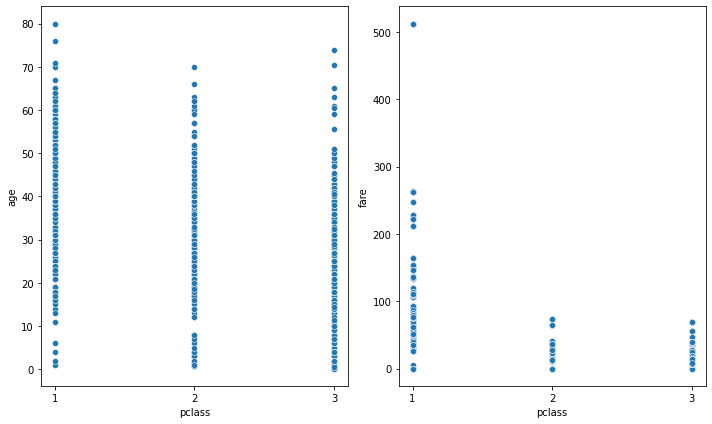

In [181]:
# 객실 등급과 연령 / 객실 등급과 운임의 상관관계 파악
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.xticks([1, 2, 3])
sns.scatterplot(df['pclass'], df['age'])

plt.subplot(122)
plt.xticks([1, 2, 3])
sns.scatterplot(df['pclass'], df['fare'])

plt.tight_layout()
plt.show()

In [182]:
df[df['fare'] > 30]['survived'].mean()

0.5714285714285714

In [184]:
df[df['age'] < 10]['survived'].mean()

0.6097560975609756

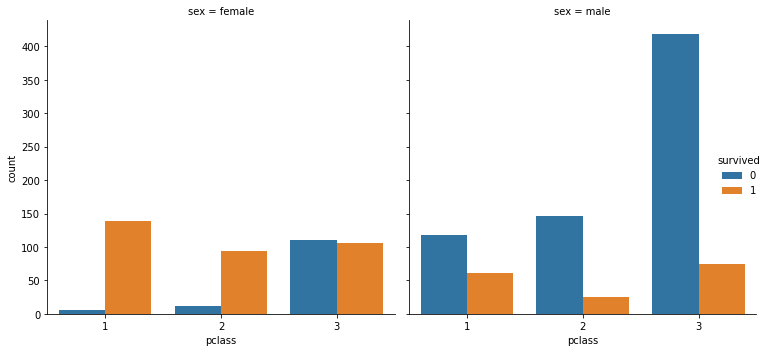

In [185]:
# 객실등급+성별 별 생존자/사망자 수 비교
sns.catplot(x='pclass', hue='survived', col='sex', kind='count', data=df)
plt.tight_layout()

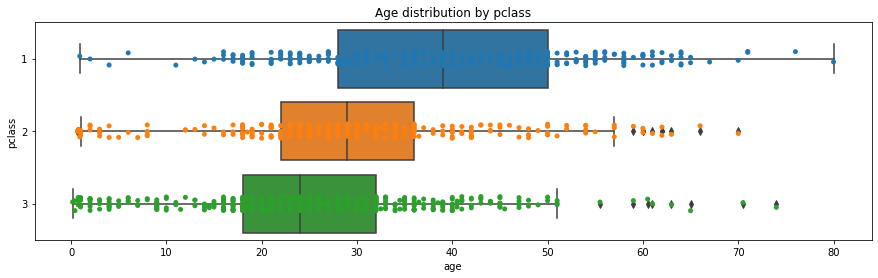

In [201]:
# 객실 등급 별 연령 분포
plt.figure(figsize=(15, 4))
plt.yticks([1, 2, 3])
plt.title('Age distribution by pclass')
sns.boxplot(x='age', y='pclass', data=df, orient='h')
sns.stripplot(x='age', y='pclass', data=df, orient='h')

plt.show()

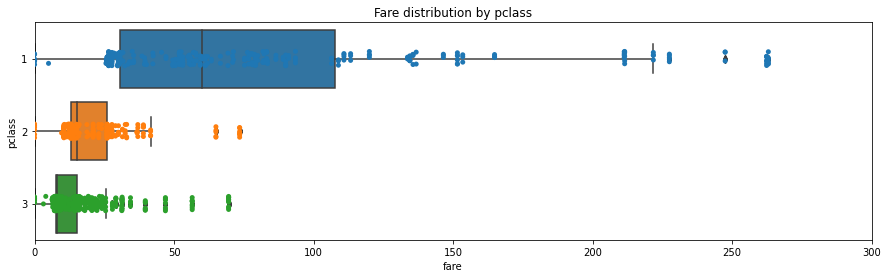

In [203]:
# 객실 등급별 운임 분포
plt.figure(figsize=(15, 4))
plt.xlim([0, 300]) # 아웃라이어 제외
plt.yticks([1, 2, 3])
plt.title('Fare distribution by pclass')
sns.boxplot(x='fare', y='pclass', data=df, orient='h')
sns.stripplot(x='fare', y='pclass', data=df, orient='h')

plt.show()

In [204]:
# (참고) 운임 최대값을 가진 데이터의 인덱스
df['fare'].idxmax()

49

In [207]:
# (참고) 운임 최대값을 가진 데이터의 내용
df.iloc[df['fare'].idxmax()]

pclass                                                     1
survived                                                   1
name                      Cardeza, Mr. Thomas Drake Martinez
sex                                                     male
age                                                       36
sibsp                                                      0
parch                                                      1
ticket                                              PC 17755
fare                                                 512.329
cabin                                            B51 B53 B55
embarked                                                   C
boat                                                       3
body                                                     NaN
home.dest     Austria-Hungary / Germantown, Philadelphia, PA
age_class                                                30s
fare_class                                            over50
Name: 49, dtype: object